 <p style = "font-size: 40px;font-weight: bold;text-align:center;color:#0000FF"> Multiple Linear Regression </p>


<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Ravi kumar
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 02/06/2022

**Assumptions of Linear Regression**

- There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s)

- The independent variables should not be correlated. Absence of this phenomenon is known as **multicollinearity**

- No auto correaltion

**Difference between Logistic regression and Linear regression**

- Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems. Linear regression provides a continuous output but Logistic regression provides discreet output

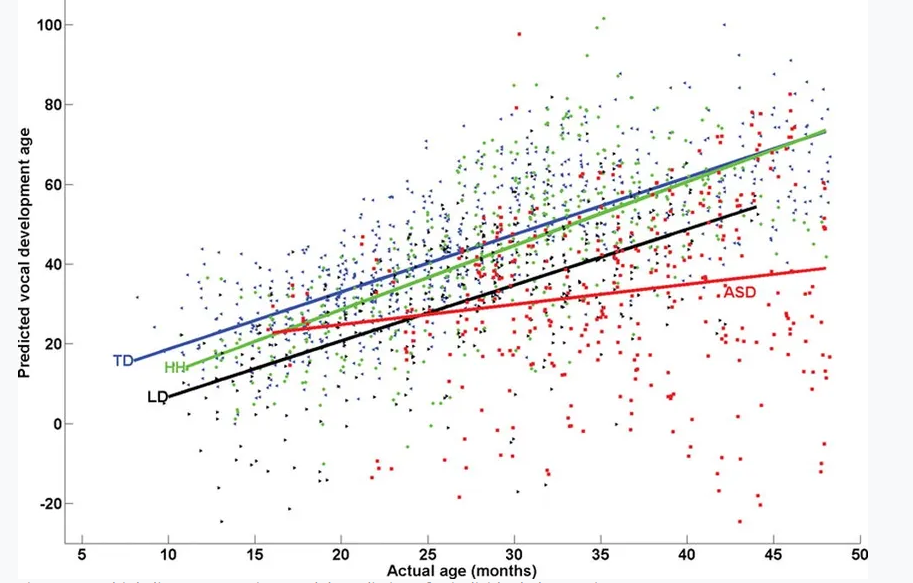

**Step by step process to Choose the right variable to use in model**

-  **Select all varible and train your model on it** - Follow this step only when you know that all the variables are equally important

-  **Backward Elimination** - 
   - Select a significance level of 0.05
   - Train the full model
   - If the P value for the varible is higher than SL then eliminate it else keep it
   - Retrain the model
 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading the dataset

In [8]:
#CSV file
df_startup = pd.read_csv("50_Startups.csv")
display(df_startup.head(5))
df_startup.State.unique()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


array(['New York', 'California', 'Florida'], dtype=object)

- Here we have column as R&D, admin, marketing expenduture
- We have to create a Multiple Linear regressor that fits the data in a straight line

**Multiple Linear Regression**

**Y = b0 + b1 * x1 + b2 * x2 +...+ bn * xn**

- x is independent variable 
- Y is a dependent variable

## Checking for NULL values

In [4]:
#checking for NULL
print(df_startup.isnull().sum()*100/df_startup.shape[0])

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64


- Now we know that we don't have any NULL value in our dataset so that we can proceed further

## Splitting the Train and Test data

In [5]:
#Getting X and y variable
X = df_startup.drop('Profit',axis=1)
y =df_startup['Profit']

In [6]:
display(X.head())
print("Shape of X ",X.shape)
print("\n\n")
display(y.head().reset_index())
print("Shape of y", y.shape)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


Shape of X  (50, 4)





,index,Profit
0,0,192261.83
1,1,191792.06
2,2,191050.39
3,3,182901.99
4,4,166187.94


Shape of y (50,)


## Catergorical varible into Numerical variable

In [9]:
X = pd.get_dummies(X, prefix=['State'], columns=['State'],drop_first=True)
display(X.head())

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [10]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print("Size of X train",X_train.shape)
print("Size of y train",y_train.shape)
print("Size of X Test",X_test.shape)
print("Size of y Test",y_test.shape)

Size of X train (40, 5)
Size of y train (40,)
Size of X Test (10, 5)
Size of y Test (10,)


In [11]:
#Creating a model object and fiting the data
reg = LinearRegression()
reg.fit(X_train,y_train)

y_test_pred = reg.predict(X_test) #predicting the Test data
# y_train_pred = reg.predict(X_train)

r2_score = reg.score(X_test,y_test)
print("Accuracy score -- ",r2_score*100,'%')

Accuracy score --  93.47068473282424 %


## Checking fited line using Regplot

<AxesSubplot:xlabel='Profit'>

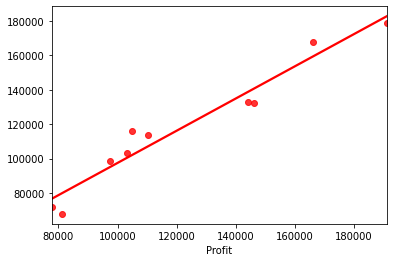

In [12]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color="r")

## Feature importance using Coefficient

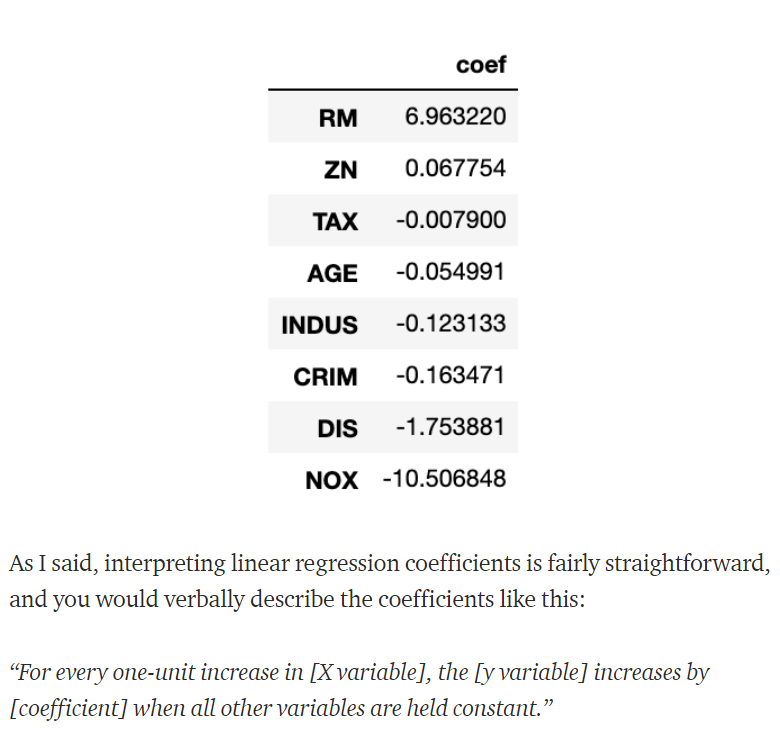

In [13]:
l_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score': reg.coef_[0]}).sort_values(by='Importance_Score',ascending=False)

['R&D Spend', 'Administration', 'Marketing Spend']


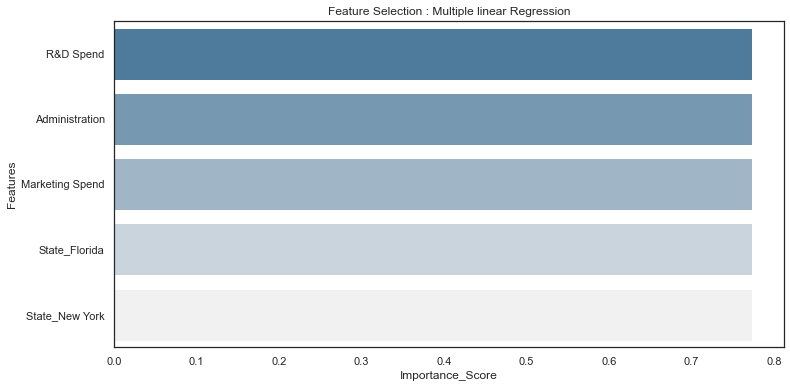

In [14]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score", y="Features", data=l_reg , palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : Multiple linear Regression')

l_reg['Score_Imp_mod'] = abs(l_reg['Importance_Score'])
l_reg.sort_values(by='Score_Imp_mod', ascending=False, inplace=True)
l_top = list(l_reg['Features'].head(3))
print(l_top)

## Backward Elimination Method

**statsmodels.formula.api**

*Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable*

In [15]:
#Adding a column with a constant value to let the model know that we are using linear reg
X = np.append(arr=np.ones((50,1)).astype(int), values = X, axis=1)

In [18]:
X_opt = X[:,[0,1,2,3,4,5]] #selecting all the columns
reg_OLS = sm.OLS(endog = y,exog = X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.34e-27
Time:                        19:43:11   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Remove the independent varible with maximum P value*

In [19]:
X_opt = X[:,[0,1,2,3,4]] #selecting all the columns
reg_OLS = sm.OLS(endog = y,exog = X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           8.49e-29
Time:                        19:43:59   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_opt = X[:,[0,1,2,3]] #selecting all the columns
reg_OLS = sm.OLS(endog = y,exog = X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        19:44:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X_opt = X[:,[0,1,3]] #selecting all the columns
reg_OLS = sm.OLS(endog = y,exog = X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.16e-31
Time:                        19:44:17   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_opt = X[:,[0,1]] #selecting all the columns
reg_OLS = sm.OLS(endog = y,exog = X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.50e-32
Time:                        19:44:23   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

**R & D have most impact on the dependent variable**